In [14]:
#Import Libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from glob import glob


In [15]:
image_path=glob(r"E:\Python\downloads/*.jpg")

In [16]:
print(image_path[0:3],end='')

['E:\\Python\\downloads\\cat_1.jpg', 'E:\\Python\\downloads\\cat_10.jpg', 'E:\\Python\\downloads\\cat_2.jpg']

In [17]:
#def features extractor:(color histogram)
def extract_color_histogram(path, bins=(8,8,8)):
    image = cv2.imread(path)
    image = cv2.resize(image,(100,100))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #<--FIx here
    hist = cv2.calcHist([hsv],[0,1,2],None, bins, [0,180,0,256,0,256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [18]:
#Extract Features
features=[]
for path in image_path:
    hist=extract_color_histogram(path)
    features.append(hist)
features=np.array(features)

In [19]:
#Find the appropriate clusters
wcss=[]
for c in range(2,9):
    kmeans=KMeans(n_clusters=c)
    kmeans.fit_transform(features)
    wcss.append(kmeans.inertia_)

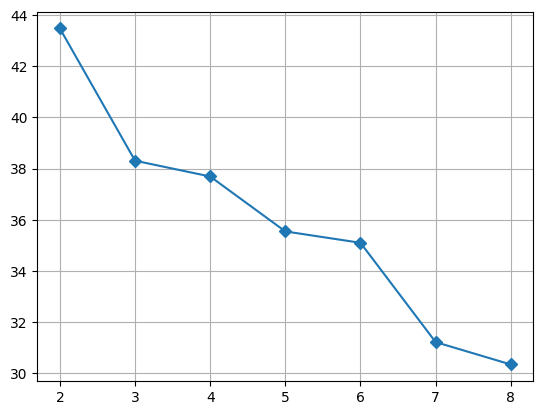

In [20]:
#Plot possibility
plt.plot(range(2,9),wcss, marker='D')
plt.grid()

In [21]:
#clusters = 6
kmeans = KMeans(n_clusters = 5)

In [22]:
labels=kmeans.fit_predict(features)

In [23]:
#5. Visualize clusters
def show_cluster(cluster_num):
    plt.figure(figsize=(12,6))
    idxs = np.where(labels == cluster_num)[0][:10]
    for i, idx in enumerate(idxs):
        img = cv2.imread(image_path[idx])
        img = cv2.cvtColor(cv2.resize(img, (100, 100)),cv2.COLOR_BGR2RGB)
        plt.subplot(2,5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_num}")
    plt.show()

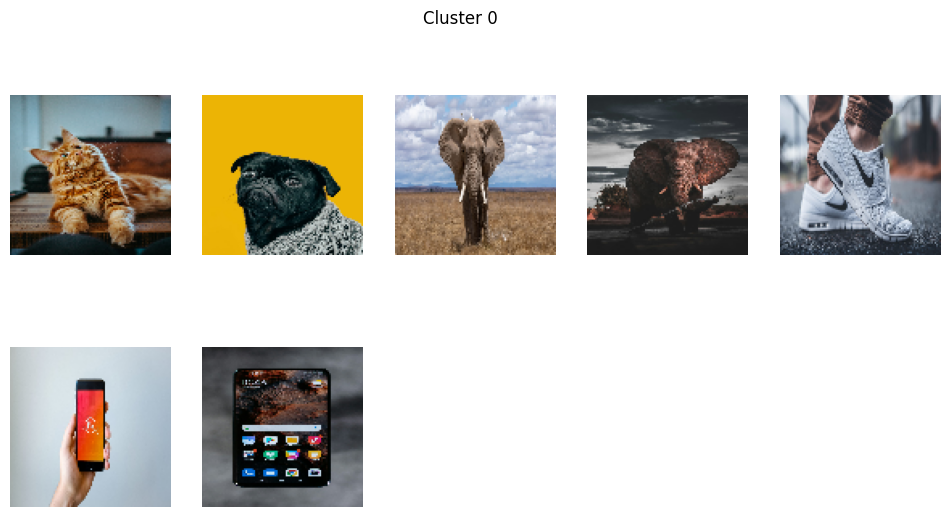

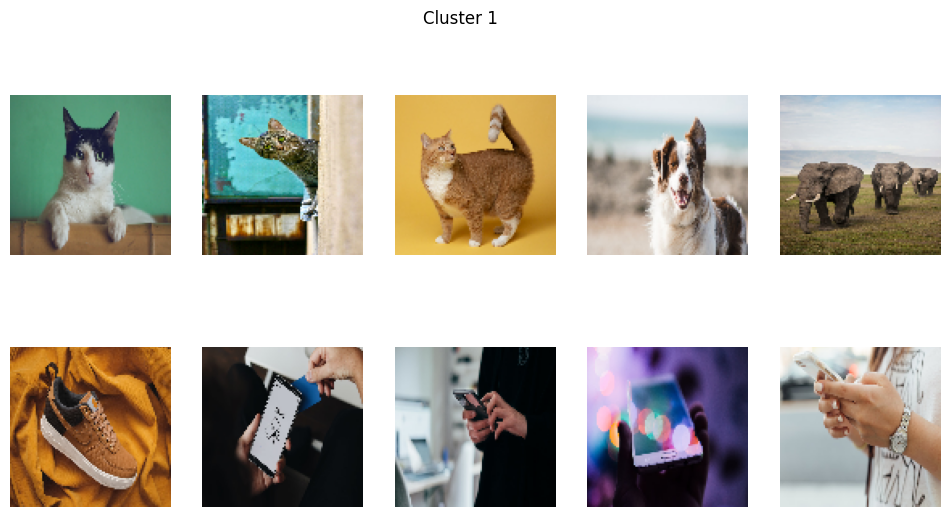

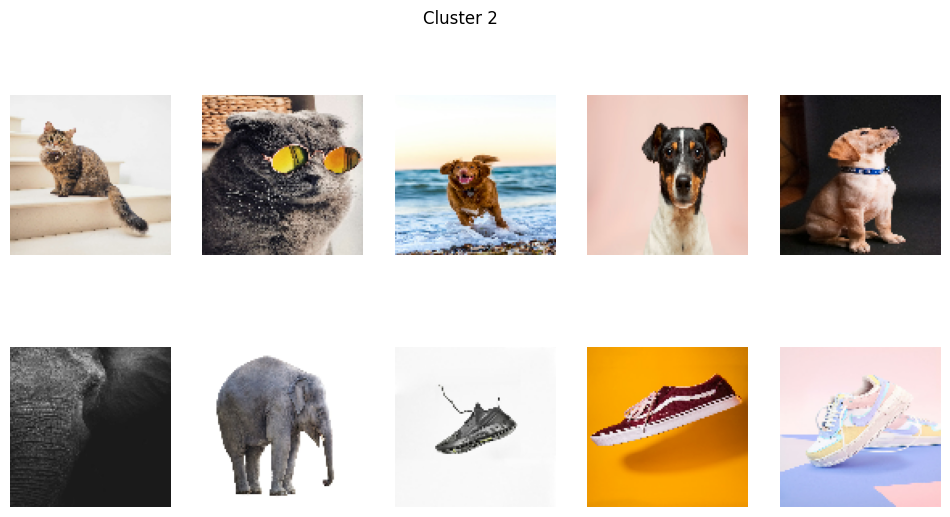

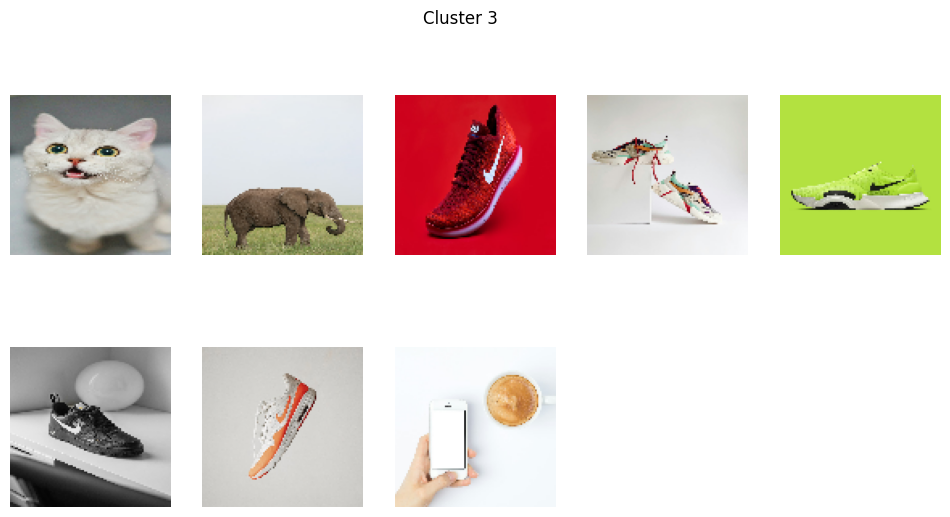

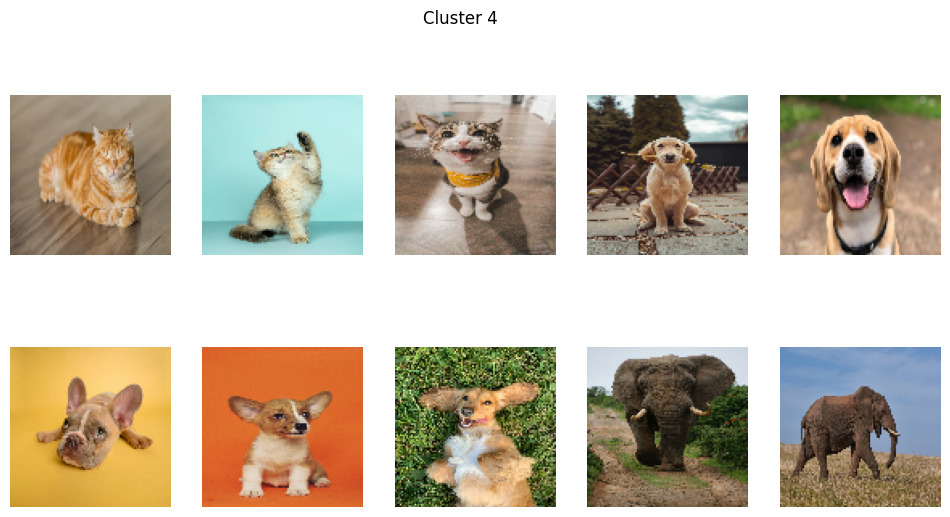

<Figure size 1200x600 with 0 Axes>

In [24]:
#Display all clusters
for i in range(6):
    show_cluster(i)

In [25]:
features

array([[0.0000000e+00, 6.4954162e-04, 6.4954162e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1282826e-03, 1.1282826e-03, 2.8207065e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.8444510e-01, 6.3672960e-03, 1.5918240e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7529735e-03, 1.7529735e-03, 0.0000000e+00, ..., 6.7781642e-02,
        0.0000000e+00, 0.0000000e+00],
       [3.9163107e-04, 7.8326213e-04, 4.6995729e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], shape=(50, 512), dtype=float32)